# ECA

In [54]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import decomposition 

In [55]:
df = pd.read_csv("ECA.csv", na_filter = True)
display(df)

,PersonID,age,sex,bmi,children,smoker,region,charges
0,1,19.0,female,27.900,0,yes,southwest,16884.92400
1,2,18.0,male,33.770,1,no,southeast,1725.55230
2,3,28.0,male,33.000,3,no,southeast,4449.46200
3,4,33.0,male,22.705,0,no,northwest,21984.47061
4,5,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1335,1334,50.0,male,30.970,3,no,northwest,10600.54830
1336,1335,18.0,female,31.920,0,no,northeast,2205.98080
1337,1336,18.0,female,36.850,0,no,southeast,1629.83350
1338,1337,21.0,female,25.800,0,no,southwest,2007.94500


In [56]:
duplicates = df.duplicated()
total_duplicates = duplicates.sum()

duplicate_rows = df[df.duplicated(keep=False)]
display(duplicate_rows)

print(f"Total duplicates:", total_duplicates)

,PersonID,age,sex,bmi,children,smoker,region,charges
99,100,38.0,male,19.3,0,yes,southwest,15820.699
100,100,38.0,male,19.3,0,yes,southwest,15820.699
101,100,38.0,male,19.3,0,yes,southwest,15820.699


Total duplicates: 2


In [57]:
df2 = df.drop_duplicates()

In [58]:
df2.isnull().sum(axis=0)

PersonID      0
age         123
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
dtype: int64

In [59]:
df3 = pd.DataFrame(df2)
df3['age'].fillna(df2.groupby(['sex', 'children'])['age'].transform('median'), inplace=True)
display(df3)
df3.isnull().sum(axis=0)

,PersonID,age,sex,bmi,children,smoker,region,charges
0,1,19.0,female,27.900,0,yes,southwest,16884.92400
1,2,18.0,male,33.770,1,no,southeast,1725.55230
2,3,28.0,male,33.000,3,no,southeast,4449.46200
3,4,33.0,male,22.705,0,no,northwest,21984.47061
4,5,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1335,1334,50.0,male,30.970,3,no,northwest,10600.54830
1336,1335,18.0,female,31.920,0,no,northeast,2205.98080
1337,1336,18.0,female,36.850,0,no,southeast,1629.83350
1338,1337,21.0,female,25.800,0,no,southwest,2007.94500


PersonID    0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
# Loop through all columns and print unique values
for column in df3.columns:
    unique_values = df3[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in PersonID: [   1    2    3 ... 1336 1337 1338]
Unique values in age: [19. 18. 28. 33. 32. 31. 46. 37. 60. 25. 62. 23. 56. 27. 52. 30. 34. 59.
 63. 55. 22. 26. 35. 24. 41. 38. 36. 21. 48. 40. 58. 53. 43. 64. 20. 61.
 44. 57. 29. 45. 54. 49. 47. 51. 39. 42. 50.]
Unique values in sex: ['female' 'male' 'F' 'M']
Unique values in bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6

In [61]:
df4 = pd.DataFrame(df3)

sex_values = {'female': 'F', 'male': 'M'}
df4['sex'] = df3['sex'].replace(sex_values)

display(df4)

,PersonID,age,sex,bmi,children,smoker,region,charges
0,1,19.0,F,27.900,0,yes,southwest,16884.92400
1,2,18.0,M,33.770,1,no,southeast,1725.55230
2,3,28.0,M,33.000,3,no,southeast,4449.46200
3,4,33.0,M,22.705,0,no,northwest,21984.47061
4,5,32.0,M,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1335,1334,50.0,M,30.970,3,no,northwest,10600.54830
1336,1335,18.0,F,31.920,0,no,northeast,2205.98080
1337,1336,18.0,F,36.850,0,no,southeast,1629.83350
1338,1337,21.0,F,25.800,0,no,southwest,2007.94500


In [62]:
df4.isnull().sum(axis=0)

PersonID    0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [63]:
unique_values = df4["sex"].unique()
print(unique_values)

['F' 'M']


# Creating visualisations

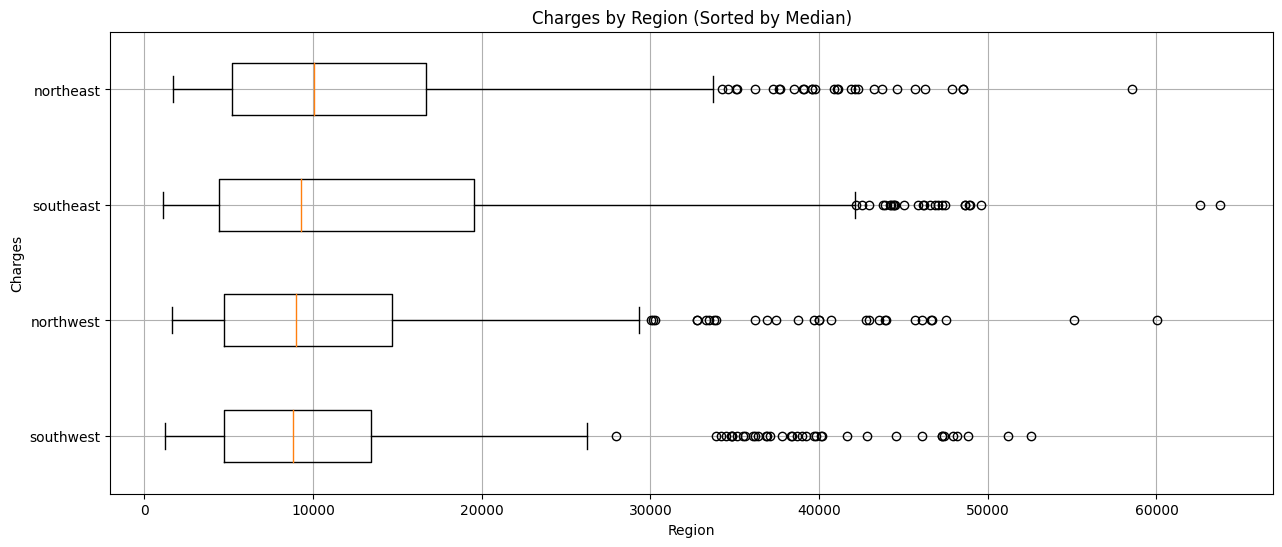

In [64]:
# Import matplotlib library
import matplotlib.pyplot as plt


# Group data by region and charges, and sort by median
median_sorted_regions = df4.groupby('region')['charges'].median().sort_values().index

# Create a boxplot using Matplotlib
plt.figure(figsize=(15, 6))
plt.boxplot([df4[df4['region'] == region]['charges'] for region in median_sorted_regions], labels=median_sorted_regions, vert=False)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges by Region (Sorted by Median)')
plt.grid(True)

# Show the plot
plt.show()

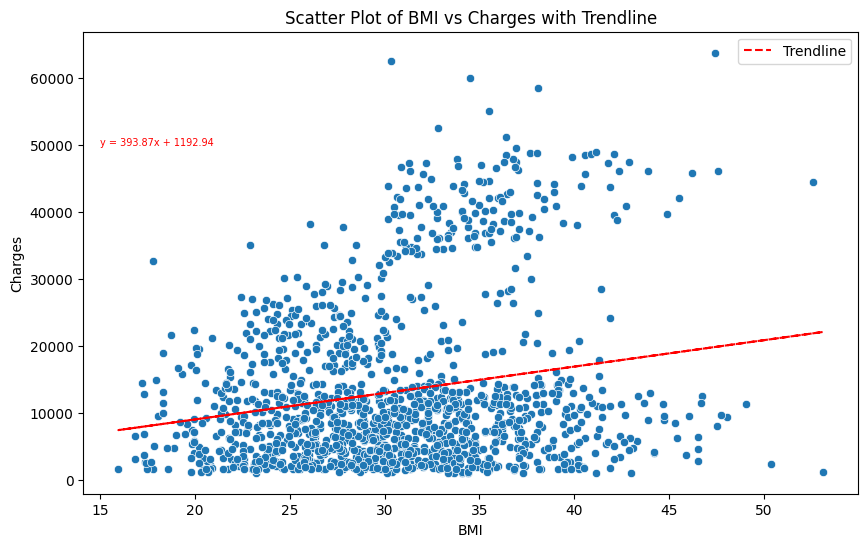

In [67]:
#import seaborn,numpy and matplotlib library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot using Seaborn
sns.scatterplot(x='bmi', y='charges', data=df4)

# Calculate the trendline (best-fit line)
z = np.polyfit(df4['bmi'], df4['charges'], 1)
p = np.poly1d(z)

# Overlay the trendline on the plot
plt.plot(df4['bmi'], p(df4['bmi']), "r--", label="Trendline")

# Display the equation on the plot
equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
plt.text(15, 50000, equation, fontsize=7, color='red')

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatter Plot of BMI vs Charges with Trendline')
plt.legend()
plt.show()

## Using seaborn

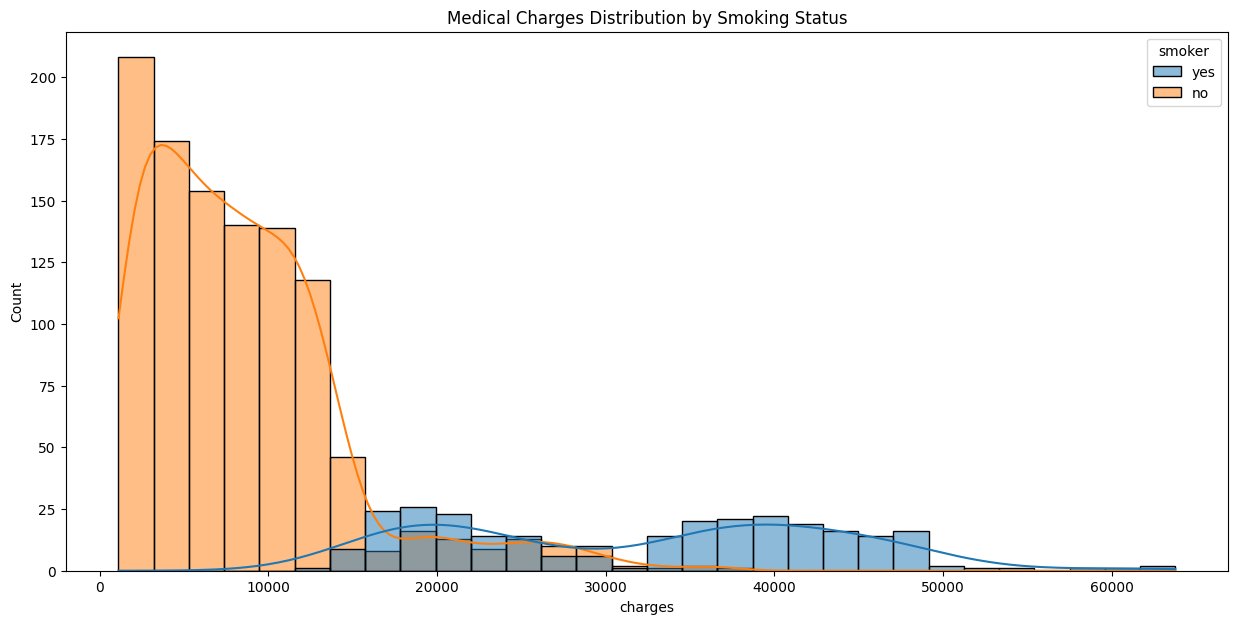

In [53]:
#import seaborn and matplotlib library
import seaborn as sns
import matplotlib.pyplot as plt

# plot a histogram chart with count of charges and smoker
plt.figure(figsize=(15, 7))
plt.title('Medical Charges Distribution by Smoking Status')
sns.histplot(x='charges', data=df4, kde=True, hue='smoker')
plt.show()

In [ ]:
# We don't need any dependent variables here
columns_to_drop = ['smoker', 'PersonID','region','sex']
df_1 = df4.drop(columns_to_drop, axis=1)
display(df_1)

In [ ]:
#initiate the k means estimator
kmeans = KMeans(n_clusters=5)# choose 4 clusters
# fit k mean clustering
kmeans.fit(df_1)

In [ ]:
# # Add the cluster labels to the DataFrame
df_1['cluster'] = kmeans.labels_
df_1.head()

In [ ]:
plt.figure(figsize=(10, 7))
colors = {0:'red', 1:'green', 2:'orange', 3:'blue', 4:'yellow'}

plt.scatter(df_1['age'], df_1['charges'], c=df_1['cluster'].map(colors))
plt.title('Scatter Plot of BMI Clusters')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Creating decision tree

In [68]:
# Create dataframe for decision tree, dropping columns smoker and personID, which are not independent variables
columns_to_drop = ['smoker', 'PersonID']
df_X = df4.drop(columns_to_drop, axis=1)
display(df_X)

,age,sex,bmi,children,region,charges
0,19.0,F,27.900,0,southwest,16884.92400
1,18.0,M,33.770,1,southeast,1725.55230
2,28.0,M,33.000,3,southeast,4449.46200
3,33.0,M,22.705,0,northwest,21984.47061
4,32.0,M,28.880,0,northwest,3866.85520
...,...,...,...,...,...,...
1335,50.0,M,30.970,3,northwest,10600.54830
1336,18.0,F,31.920,0,northeast,2205.98080
1337,18.0,F,36.850,0,southeast,1629.83350
1338,21.0,F,25.800,0,southwest,2007.94500


In [71]:
# Create dummy variables for the categorical features in df_X
X = pd.get_dummies(df_X)

# Display the resulting DataFrame with dummy variables
display(X)

# Assuming you have a DataFrame df4, and you want to extract the 'smoker' column as the target variable
# Extract the 'smoker' column as the target variable y
y = df4['smoker']

# Display the extracted target variable
display(y)

,age,bmi,children,charges,sex_F,sex_M,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,1,0,0,0,0,1
1,18.0,33.770,1,1725.55230,0,1,0,0,1,0
2,28.0,33.000,3,4449.46200,0,1,0,0,1,0
3,33.0,22.705,0,21984.47061,0,1,0,1,0,0
4,32.0,28.880,0,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1335,50.0,30.970,3,10600.54830,0,1,0,1,0,0
1336,18.0,31.920,0,2205.98080,1,0,1,0,0,0
1337,18.0,36.850,0,1629.83350,1,0,0,0,1,0
1338,21.0,25.800,0,2007.94500,1,0,0,0,0,1


0       yes
1        no
2        no
3        no
4        no
       ... 
1335     no
1336     no
1337     no
1338     no
1339    yes
Name: smoker, Length: 1338, dtype: object

# Decision Tree

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
display(X)

,age,bmi,children,charges,sex_F,sex_M,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,1,0,0,0,0,1
1,18.0,33.770,1,1725.55230,0,1,0,0,1,0
2,28.0,33.000,3,4449.46200,0,1,0,0,1,0
3,33.0,22.705,0,21984.47061,0,1,0,1,0,0
4,32.0,28.880,0,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1335,50.0,30.970,3,10600.54830,0,1,0,1,0,0
1336,18.0,31.920,0,2205.98080,1,0,1,0,0,0
1337,18.0,36.850,0,1629.83350,1,0,0,0,1,0
1338,21.0,25.800,0,2007.94500,1,0,0,0,0,1


In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print the shapes of the training and testing sets to verify the split
print("Training set shapes: ", X_train.shape, y_train.shape)
print("Testing set shapes: ", X_test.shape, y_test.shape)

Training set shapes:  (1070, 10) (1070,)
Testing set shapes:  (268, 10) (268,)


In [83]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate the model on the training data
y_train_pred = clf.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the test data
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Check for overfitting by comparing training and test accuracies
if training_accuracy > test_accuracy:
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")

Training Accuracy: 0.97
Test Accuracy: 0.97
The model is not overfitting.


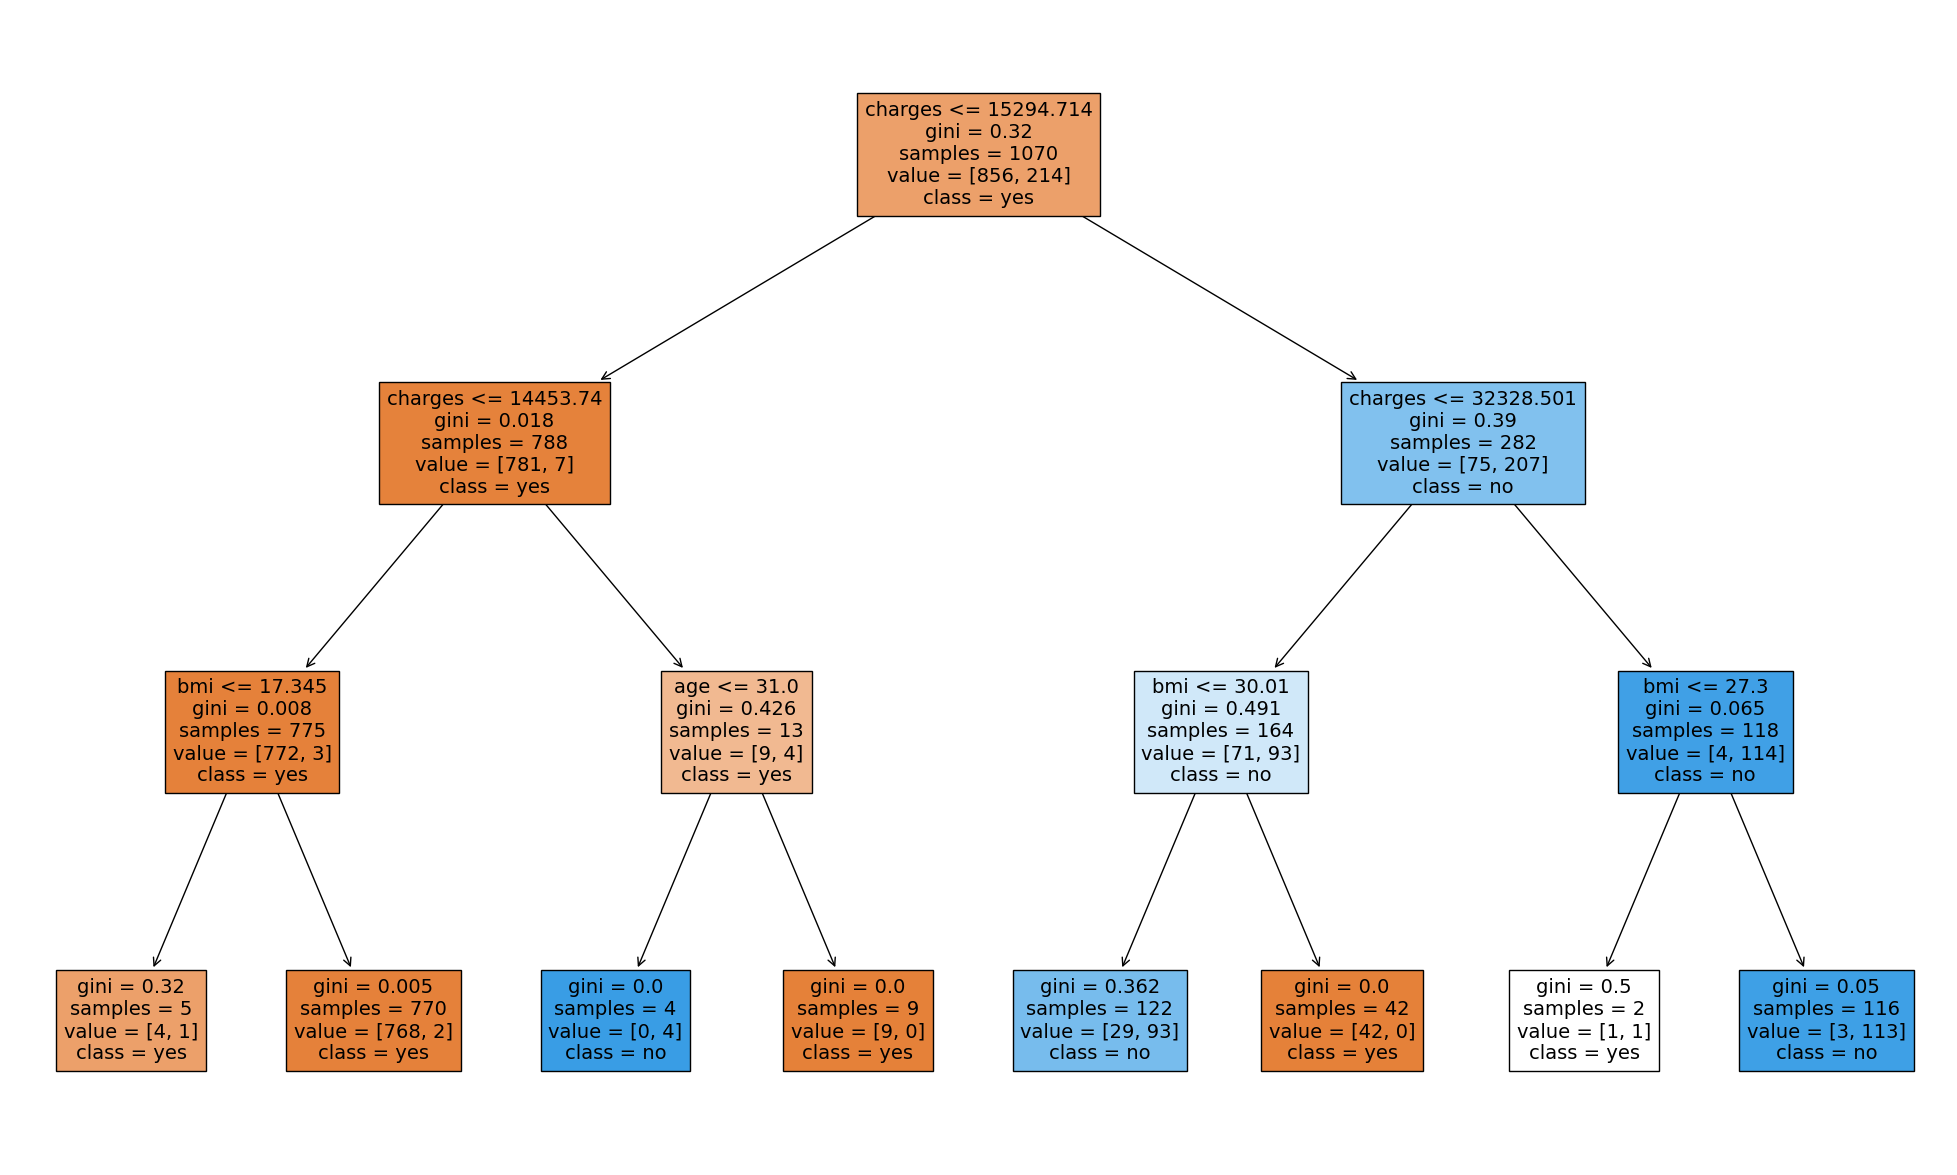

In [84]:
# from sklearn import plot_tree
# control the plotting size 
plt.figure(figsize=(25, 15))
# Plot the decision tree
tree.plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=list(y.unique()))
plt.savefig('tree.png')